
## **Clustering Analysis of Obsidian from South American Volcanoes**

## **ABSTRACT**

Introduction

The Nazca Plate is an active oceanic tectonic plate that is subducting the South American Plate causing a chain of volcanoes on and off the coast of Western South America. A type of volcanic rock, obsidian, naturally forms when lava cools rapidly with minimal crystal growth. Obsidian are produced from felsic lavas which are rich in lighter elements such as silicon, aluminium, sodium, and potassium. These geochemical properties characterize Obsidian rocks but between these obsidian samples, there are a range in elemental weight. The difference in elemental weight can be due to different conditions that occured to the lava and when the lava solidified. Through looking at the geochemical fluxations that occur to different samples of Obsidan rock, we can understand the chemical change in these samples and where they are located. Chemical changes in obsidian samples can provide insight into Nazca-South American subduction zone and the mantle conditions. In addition, Obsidian samples are commonly used in different cultures for its hard strength and ability to fracture and create sharp edges. To be able to understand where obsidian samples are located allow anthropologist to understand where these cultures would go explore to obtain these samples.

Since volcanic acitivty along Western South America is vast it is possible that the geochemistry in obsidian samples are different based on potentially there being region differences. With the subduction zone being the main geologic activity in these regions which would provide the lava needed for these volcanic eruptions, there is a possibility that the differences can be difficult to identify.

Background

Data

The data used for this project comes from the EarthChem Database. This database has geochemical data from various papers. This project uses various papers that looked at obsidian samples in the Western South American region. These papers used various methodologies to conduct their geochemical analysis ( ie: Microprob, XRF, XRD). The majority of papers selected had samples located in inland specifically on the Andean Plateau. There are few samples collected in the water along the coast. 

Methods

In [1]:
# Import Libraries 

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from dtreeviz.trees import dtreeviz
import seaborn as sns
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import numpy
from sklearn.tree import export_graphviz
import pydot
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import seaborn
import geopandas
from shapely.geos import lgeos
import fiona
from shapely.geometry import Polygon
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()
import csv
from math import radians, cos, sin, asin, sqrt

%matplotlib inline


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Open Earthchem dataset
df = pd.read_csv('/content/drive/MyDrive/earthchem_download_95122.txt', delimiter = "\t")
df

,SAMPLE ID,IGSN,SOURCE,REFERENCE,CRUISE ID,LATITUDE,LONGITUDE,LOC PREC,MIN AGE,AGE,MAX AGE,MATERIAL,TYPE,COMPOSITION,ROCK NAME,MINERAL,SIO2,TIO2,AL2O3,CR2O3,FE2O3,FE2O3T,FEO,FEOT,NIO,MNO,MGO,CAO,NA2O,K2O,P2O5,BAO,LOI,H2O,H2O_M,H2O_P,SO3,V2O3,ZNO,FE,...,INDIUM,K,LI,MG.1,MN.1,MO,NA,NB,NI.1,P,PB,PD,RB,RE,S.1,SB,SC,SE,SN,SR,TA,TE,TH,TI,TL,U,V,W,Y,ZN.1,ZR,TI.1,AS.2,AS.3,GER.1,H2O_M.1,H2O_P.1,H2O_M.2,H2O_P.2,INDIUM.1
0,080385-4,NaN,GEOROC,"HICKEY-VARGAS, R.; HOLBIK, S.; TORMEY, D. R.; ...",NaN,-41.1000,-72.4930,0.01,NaN,NaN,NaN,igneous,volcanic,felsic,dacite,NaN,69.144,0.565,14.590,NaN,NaN,NaN,NaN,4.261,NaN,0.081,1.111,3.544,4.402,2.141,0.162,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,11,NaN,18.9,NaN,69.1,NaN,NaN,NaN,11.9,NaN,NaN,190.0,0.50,NaN,8.60,NaN,NaN,NaN,43.0,NaN,42.0,62,282.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,230483-3,NaN,GEOROC,"HICKEY-VARGAS, R.; HOLBIK, S.; TORMEY, D. R.; ...",NaN,-41.1000,-72.4930,0.01,NaN,NaN,NaN,igneous,volcanic,felsic,dacite,NaN,63.541,0.796,16.427,NaN,NaN,NaN,NaN,5.973,NaN,0.121,1.732,5.136,4.562,1.460,0.252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,10,NaN,15.8,NaN,45.6,NaN,NaN,NaN,15.8,NaN,NaN,294.0,0.30,NaN,4.30,NaN,NaN,NaN,76.0,NaN,33.0,101,195.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,PU-02-34,NaN,GEOROC,"SINGER, B. S.; JICHA, B. R.; HARPER, M. A.; NA...",NaN,-40.5088,-72.2060,0.01,NaN,NaN,NaN,igneous,volcanic,felsic,dacite,NaN,70.931,0.340,13.794,NaN,NaN,NaN,NaN,4.671,NaN,0.140,0.310,1.771,5.182,2.791,0.070,NaN,0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,27,NaN,14.0,NaN,62.0,NaN,NaN,0.5,NaN,NaN,NaN,138.0,0.47,NaN,8.30,NaN,NaN,2.24,NaN,NaN,53.7,96,307.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,PU-02-25,NaN,GEOROC,"SINGER, B. S.; JICHA, B. R.; HARPER, M. A.; NA...",NaN,-40.5275,-72.1812,0.01,NaN,NaN,NaN,igneous,volcanic,felsic,dacite,NaN,70.047,0.688,14.039,NaN,NaN,NaN,NaN,4.367,NaN,0.110,0.638,2.154,5.195,2.612,0.150,NaN,0.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.9,NaN,NaN,23.0,NaN,73.0,NaN,NaN,0.7,NaN,NaN,NaN,161.0,0.55,NaN,9.18,NaN,NaN,2.55,14.0,NaN,54.7,119,342.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,PU-02-20,NaN,GEOROC,"SINGER, B. S.; JICHA, B. R.; HARPER, M. A.; NA...",NaN,-40.5675,-72.1743,0.01,NaN,NaN,NaN,igneous,volcanic,felsic,dacite,NaN,69.367,0.531,14.150,NaN,NaN,NaN,NaN,5.167,NaN,0.150,0.471,2.213,5.167,2.664,0.120,NaN,< 0.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.7,NaN,NaN,32.0,NaN,66.0,NaN,NaN,0.7,NaN,NaN,NaN,197.0,0.48,NaN,8.82,NaN,NaN,2.37,NaN,NaN,39.8,144,308.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3058,DBF-03-05,NaN,GEOROC,"HORA, J. M.; SINGER, B. S.; WÖRNER, G., 2007",NaN,-18.1958,-69.2527,0.01,NaN,NaN,NaN,igneous,volcanic,felsic,dacite,NaN,64.904,0.834,16.277,NaN,NaN,NaN,NaN,3.854,NaN,0.061,1.801,3.835,4.568,3.540,0.326,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3059,DBF04-6,NaN,GEOROC,"JICHA, B. R.; LAABS, B. J. C.; HORA, J. M.; SI...",NaN,-18.1928,-69.2434,0.01,NaN,NaN,NaN,igneous,volcanic,felsic,rhyodacite,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3060,DBF04-5,NaN,GEOROC,"JICHA, B. R.; LAABS, B. J. C.; HORA, J. M.; SI...",NaN,-18.1929,-69.2433,0.01,NaN,NaN,NaN,igneous,volcanic,felsic,rhyodacite,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [4]:
# Data Stats
df.describe()

,IGSN,LATITUDE,LONGITUDE,LOC PREC,MIN AGE,AGE,MAX AGE,MINERAL,SIO2,TIO2,AL2O3,CR2O3,FE2O3,FE2O3T,FEO,FEOT,NIO,MNO,MGO,CAO,NA2O,K2O,P2O5,BAO,H2O,H2O_M,H2O_P,SO3,V2O3,ZNO,FE,MN,CD,AS,AG,S,AL,CA,MG,SR87_SR86,...,HF,HG,I,INDIUM,K,LI,MG.1,MN.1,MO,NA,NB,P,PB,PD,RB,RE,S.1,SB,SE,SN,SR,TA,TE,TH,TI,TL,U,V,W,Y,ZR,TI.1,AS.2,AS.3,GER.1,H2O_M.1,H2O_P.1,H2O_M.2,H2O_P.2,INDIUM.1
count,0.0,3063.000000,3063.000000,3063.000000,1352.000000,1440.000000,1352.000000,0.0,2140.000000,2137.000000,2140.000000,50.000000,0.0,0.0,0.0,2139.000000,36.000000,2071.000000,2135.000000,2138.000000,2139.000000,2140.000000,2021.000000,21.000000,407.000000,81.000000,163.000000,93.000000,6.000000,6.000000,45.000000,42.000000,128.000000,239.000000,48.000000,118.000000,3.000000,188.000000,35.000000,437.000000,...,1265.000000,8.000000,3.000000,3.0,173.000000,406.000000,35.000000,42.000000,446.000000,39.000000,1492.000000,6.000000,1212.000000,8.000000,1870.000000,29.00000,118.000000,216.000000,7.000000,371.000000,1937.000000,1032.000000,10.000000,1532.000000,200.000000,260.000000,1322.000000,1141.000000,174.000000,1508.000000,1647.000000,200.000000,239.000000,239.000000,33.000000,81.000000,163.000000,81.000000,163.000000,3.0
mean,NaN,-29.436414,-69.961676,0.009968,40.972882,54.259535,66.329437,NaN,69.727827,0.506845,15.185684,0.016800,NaN,NaN,NaN,3.059633,0.000556,0.079324,1.080590,2.651464,3.906095,3.659449,0.163692,0.070952,0.622728,0.562716,0.966994,0.025495,0.020000,0.013333,551.876889,525.720355,5.734669,18.374184,23.258042,903.933044,6.600000,8870.662394,0.638857,0.708078,...,4.755757,0.765000,0.233333,0.0,9002.366393,56.800848,0.638857,525.720355,2.319761,16107.528205,13.723870,0.123167,54.236654,477.384625,143.529576,0.15069,903.933044,3.498287,0.785714,19.396011,356.174083,2.317409,6.905000,13.618918,828.254428,0.711842,4.735756,64.047744,38.858900,22.371591,190.392557,828.254428,18.374184,18.374184,3.537576,0.562716,0.966994,0.562716,0.966994,0.0
std,NaN,9.817008,2.227382,0.000567,258.564503,320.506284,396.412106,NaN,4.586499,0.295716,1.462794,0.047998,NaN,NaN,NaN,1.654797,0.003333,0.067451,0.883058,1.492672,1.059775,1.279555,0.098009,0.149429,0.784611,0.535546,0.875199,0.049122,0.030984,0.021602,1209.718221,484.696550,45.393418,24.401248,104.394142,4298.612288,1.252996,6398.272334,0.429519,0.008010,...,2.023469,1.958826,0.230940,0.0,18580.009643,178.105044,0.429519,484.696550,2.971864,32305.797197,11.926424,0.087133,400.240897,166.091912,110.000859,0.08122,4298.612288,17.552937,1.214398,35.542882,276.220171,29.631188,3.625114,8.147341,890.055116,0.466646,3.997264,47.985276,93.900342,14.976922,151.644587,890.055116,24.401248,24.401248,4.166317,0.535546,0.875199,0.535546,0.875199,0.0
min,NaN,-54.800000,-78.518000,0.000010,-0.002000,-19.300000,-0.000409,NaN,36.782000,0.002000,1.759000,0.000000,NaN,NaN,NaN,0.108000,0.000000,0.004000,0.010000,0.010000,0.063000,0.009000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.082622,0.000000,0.000000,0.000000,0.000000,5.300000,0.050000,0.030000,0.703330,...,0.086978,0.000000,0.100000,0.0,0.480000,2.400000,0.030000,0.082622,0.000000,0.200000,0.000000,0.009000,0.000000,250.757000,0.300000,0.04400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.650000,0.000000,0.005000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005000,0.000000,0.000000,0.700000,0.000000,0.000000,0.000000,0.000000,0.0
25%,NaN,-38.769400,-71.699050,0.010000,-0.000001,-0.000001,-0.000001,NaN,66.144000,0.287000,14.236750,0.000000,NaN,NaN,NaN,1.614500,0.000000,0.050000,0.373500,1.404500,3.264000,2.844000,0.090000,0.000000,0.143843,0.200000,0.210000,0.005070,0.000000,0.000000,1.500000,200.000000,0.065888,8.000000,0.000000,0.010000,6.000000,8332.380000,0.300000,0.704390,...,3.260000,0.000000,0.100000,0.0,2.480000,19.100000,0.300000,200.000000,1.150462,1.000000,8.000000,0.057500,13.000000,357.909250,84.000000,0.09100,0.010000,0.597500,0.000000,1.890000,168.000000,0.600000,6.577500,8.000000,655.512500,0.490000,2.10

Data Cleaning
- In order to know what samples are obsidian, we need their Silica values 
- For all samples that don't have silica, we will drop them 

In [5]:

# Drop Silica
df.dropna(subset=['SIO2'])

# Drop columns with less than 50% data 

limitPer = len(df) * .50
df = df.dropna(thresh=limitPer, axis=1)
df

,SAMPLE ID,SOURCE,REFERENCE,LATITUDE,LONGITUDE,LOC PREC,MATERIAL,TYPE,COMPOSITION,ROCK NAME,SIO2,TIO2,AL2O3,FEOT,MNO,MGO,CAO,NA2O,K2O,P2O5,BA,RB,SR,TH,ZR
0,080385-4,GEOROC,"HICKEY-VARGAS, R.; HOLBIK, S.; TORMEY, D. R.; ...",-41.1000,-72.4930,0.01,igneous,volcanic,felsic,dacite,69.144,0.565,14.590,4.261,0.081,1.111,3.544,4.402,2.141,0.162,550.0,69.1,190.0,8.60,282.0
1,230483-3,GEOROC,"HICKEY-VARGAS, R.; HOLBIK, S.; TORMEY, D. R.; ...",-41.1000,-72.4930,0.01,igneous,volcanic,felsic,dacite,63.541,0.796,16.427,5.973,0.121,1.732,5.136,4.562,1.460,0.252,396.0,45.6,294.0,4.30,195.0
2,PU-02-34,GEOROC,"SINGER, B. S.; JICHA, B. R.; HARPER, M. A.; NA...",-40.5088,-72.2060,0.01,igneous,volcanic,felsic,dacite,70.931,0.340,13.794,4.671,0.140,0.310,1.771,5.182,2.791,0.070,747.0,62.0,138.0,8.30,307.0
3,PU-02-25,GEOROC,"SINGER, B. S.; JICHA, B. R.; HARPER, M. A.; NA...",-40.5275,-72.1812,0.01,igneous,volcanic,felsic,dacite,70.047,0.688,14.039,4.367,0.110,0.638,2.154,5.195,2.612,0.150,776.0,73.0,161.0,9.18,342.0
4,PU-02-20,GEOROC,"SINGER, B. S.; JICHA, B. R.; HARPER, M. A.; NA...",-40.5675,-72.1743,0.01,igneous,volcanic,felsic,dacite,69.367,0.531,14.150,5.167,0.150,0.471,2.213,5.167,2.664,0.120,692.0,66.0,197.0,8.82,308.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3058,DBF-03-05,GEOROC,"HORA, J. M.; SINGER, B. S.; WÖRNER, G., 2007",-18.1958,-69.2527,0.01,igneous,volcanic,felsic,dacite,64.904,0.834,16.277,3.854,0.061,1.801,3.835,4.568,3.540,0.326,NaN,NaN,NaN,NaN,NaN
3059,DBF04-6,GEOROC,"JICHA, B. R.; LAABS, B. J. C.; HORA, J. M.; SI...",-18.1928,-69.2434,0.01,igneous,volcanic,felsic,rhyodacite,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3060,DBF04-5,GEOROC,"JICHA, B. R.; LAABS, B. J. C.; HORA, J. M.; SI...",-18.1929,-69.2433,0.01,igneous,volcanic,felsic,rhyodacite,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3061,CHO 099,GEOROC,"MAMANI, M.; WÖRNER, G.; SEMPERE, T., 2010",-18.3014,-69.2431,0.01,igneous,volcanic,felsic,dacite,66.728,0.555,17.025,3.542,0.030,0.807,3.845,4.087,3.199,0.182,766.0,61.0,508.0,5.00,101.0


- There are a lot of features here. Since we are focusing on geochemistry and location, we will select trace and major elements and their longitude and latitude

Define features or elements we are interested in 

In [6]:

# Variables we are interested in ( except long/lat)
cluster_variables = ['SIO2', 'TIO2', 'AL2O3', 'FEOT', 'MNO', 'MGO',
       'CAO', 'NA2O', 'K2O', 'P2O5', 'BA', 'RB', 'SR', 'TH', 'ZR']
# All variables 
all_variables = ['LONGITUDE','LATITUDE','SIO2', 'TIO2', 'AL2O3', 'FEOT', 'MNO', 'MGO',
       'CAO', 'NA2O', 'K2O', 'P2O5', 'BA', 'RB', 'SR', 'TH', 'ZR']

# All the data
data_all = df.dropna()
# Coordinates
coordinates = data_all.loc[:,['LONGITUDE','LATITUDE']]
# Elemental data
X = data_all[cluster_variables]


Creating a location value 
- Since location has requires longitude and latitude, we will use the Haversine formula into a single value 

In [7]:
# Using the Haversine formula to combine long lat into a single value 
def single_pt_haversine(lat, lng, degrees=True):
    """
    'Single-point' Haversine: Calculates the great circle distance
    between a point on Earth and the (0, 0) lat-long coordinate
    """
    r = 6371 # Earth's radius (km). Have r = 3956 if you want miles

    # Convert decimal degrees to radians
    if degrees:
        lat, lng = map(radians, [lat, lng])

    # 'Single-point' Haversine formula
    a = sin(lat/2)**2 + cos(lat) * sin(lng/2)**2
    d = 2 * r * asin(sqrt(a)) 

    return d

y = data_all.loc[:,['LONGITUDE','LATITUDE']]
pd.DataFrame([[45.0, 120.0], [60.0, 30.0]], columns=['x', 'y'])

y['harvesine_distance'] = [single_pt_haversine(LONGITUDE, LATITUDE) for LONGITUDE, LATITUDE in zip(y.LONGITUDE, y.LATITUDE)]
y


,LONGITUDE,LATITUDE,harvesine_distance
0,-72.4930,-41.1000,8550.645364
1,-72.4930,-41.1000,8550.645364
2,-72.2060,-40.5088,8513.612479
3,-72.1812,-40.5275,8511.985081
4,-72.1743,-40.5675,8512.324318
...,...,...,...
3055,-69.2194,-18.2458,7817.970784
3056,-69.2125,-18.2167,7816.865595
3057,-69.2194,-18.2458,7817.970784
3061,-69.2431,-18.3014,7821.185724


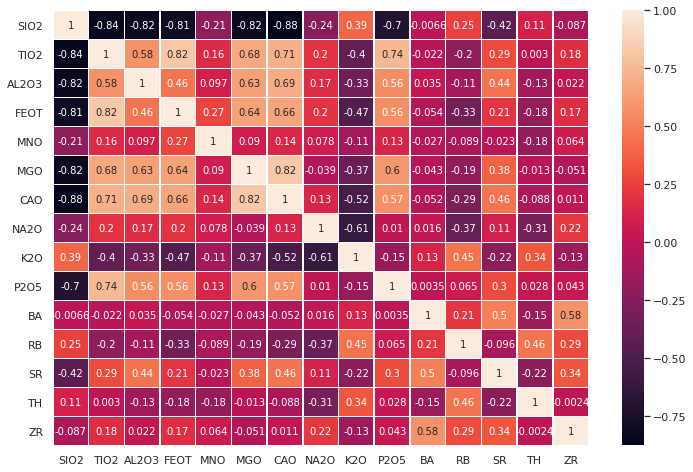

In [8]:
# Heatmap on correlation
fig,ax = plt.subplots()
fig.set_size_inches([12,8])
sns.heatmap(X.corr(),annot=True,linewidths = 0.5)
plt.show()

Choosing a Classifier 


In [9]:
# Split train test
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y['harvesine_distance'],
                                                    test_size=0.2,
                                                    random_state=42,)

# Our X variable = elemental data
# Our y variable = single point Haversine location
print('Labels counts in y:', np.bincount(y['harvesine_distance']))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y: [0 0 0 ... 0 0 3]
Labels counts in y_train: [0 0 0 ... 0 0 2]
Labels counts in y_test: [0 0 0 ... 0 0 1]


Standardizing Data

In [10]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

sc = StandardScaler()
sc.fit(X_test)
X_test_std = sc.transform(X_test)

PCA


In [11]:
# Train
pca = PCA()
principalComponents = pca.fit_transform(X_train)
print(len(principalComponents))

928


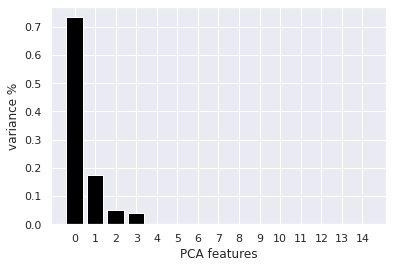

In [12]:
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)

- Out of 15 components, we see that the data is influenced by 1-2 principal components

Text(0, 0.5, 'PCA 2')

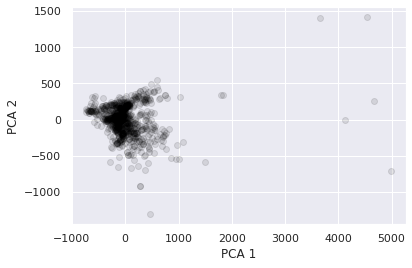

In [13]:
# Scatter plot of the first two components of the PCA model.
plt.scatter(PCA_components[0], PCA_components[1], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

Findings Clusters: Kmeans

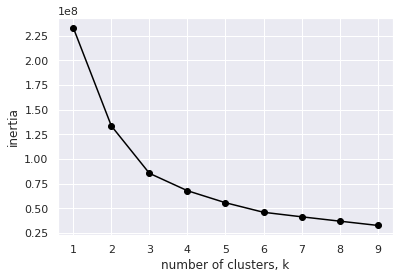

In [14]:
ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:3])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

- Here, we see that after 3 clusters the inertia begins to significantly decline. Therefore moving forward, I will choose 3 clusters

Text(0, 0.5, 'PCA 2')

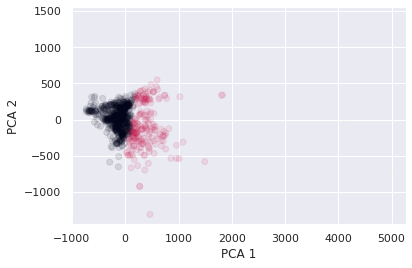

In [15]:
# Kmeans on our scaled data using 3 clusters

model= KMeans(n_clusters = 3)
model.fit(PCA_components)
PCA_components

# Labeling the clusters
y_new_train = model.labels_

# Cluster centers
model.cluster_centers_

# Plotting our data using Kmeans to separate into 3 clusters w/target ( 'Kmeans_cluster')
# Scatter plot of the first two components of the PCA model.
plt.scatter(PCA_components[0], PCA_components[1], alpha=.1,c=y_new_train)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

- Here we see that there are there is a cluster that has a significant amount of samples that is separated into two at PCA 1= 0  

233


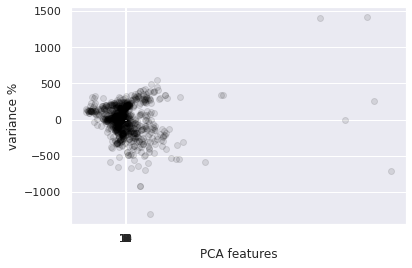

In [16]:
# Test
pca = PCA()
principalComponents = pca.fit_transform(X_test)
print(len(principalComponents))

# Scatter plot of the first two components of the PCA model.
plt.scatter(PCA_components[0], PCA_components[1], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)

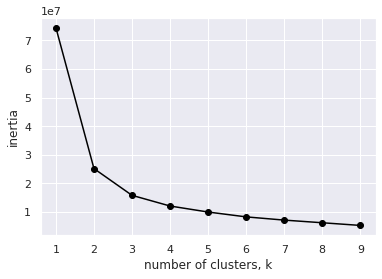

In [17]:
ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:3])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

Text(0, 0.5, 'PCA 2')

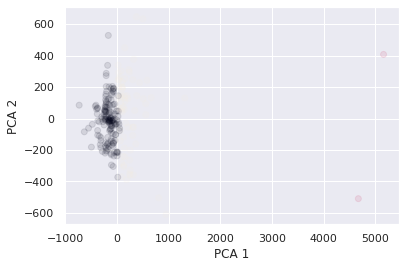

In [18]:
# Kmeans on our scaled data using 3 clusters

model= KMeans(n_clusters = 3)
model.fit(PCA_components)
PCA_components

# Labeling the clusters
y_new_test = model.labels_

# Cluster centers
model.cluster_centers_

# Plotting our data using Kmeans to separate into 3 clusters w/target ( 'Kmeans_cluster')
# Scatter plot of the first two components of the PCA model.
plt.scatter(PCA_components[0], PCA_components[1], alpha=.1,c=y_new_test)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

Linear Regression on Elements 

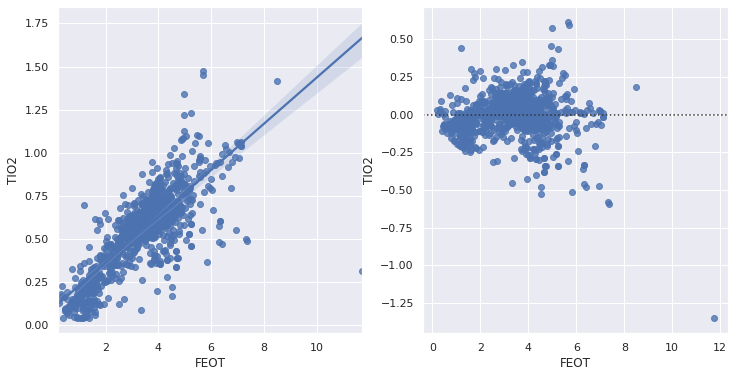

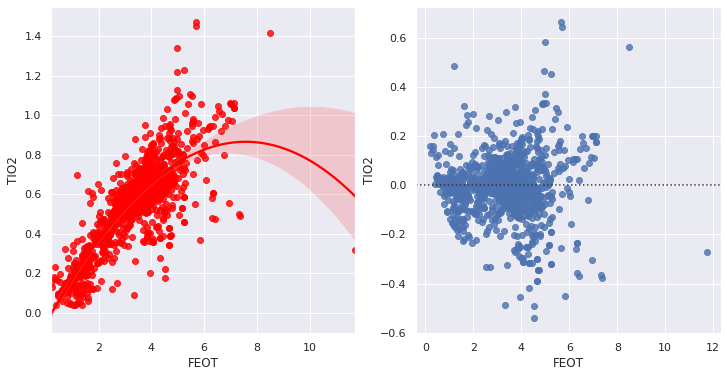

In [19]:
# Linear Regression FEOT vs. TIO2
fig, [ax0,ax1]= plt.subplots(1,2)
fig.set_size_inches([12,6])
sns.regplot(data=X,x='FEOT',y='TIO2',ax=ax0)
sns.residplot(data=X,x='FEOT',y='TIO2',ax=ax1)
plt.show()

# Polynomial regression FeoT vs.TIO2
fig, [ax0,ax1]= plt.subplots(1,2)
fig.set_size_inches([12,6])
sns.regplot(data=X,x='FEOT',y='TIO2',order=2,ax=ax0, color='red')
sns.residplot(data=X,x='FEOT',y='TIO2',order=2,ax=ax1)
plt.show()


- Here we see that as Iron increases Titanium increases. This is a typical finding that occurs in igneous samples 

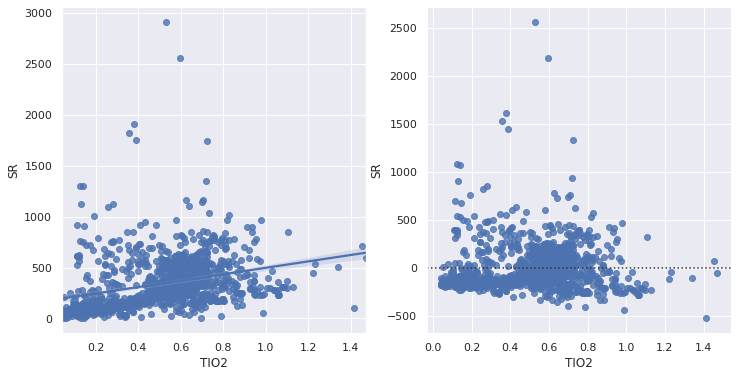

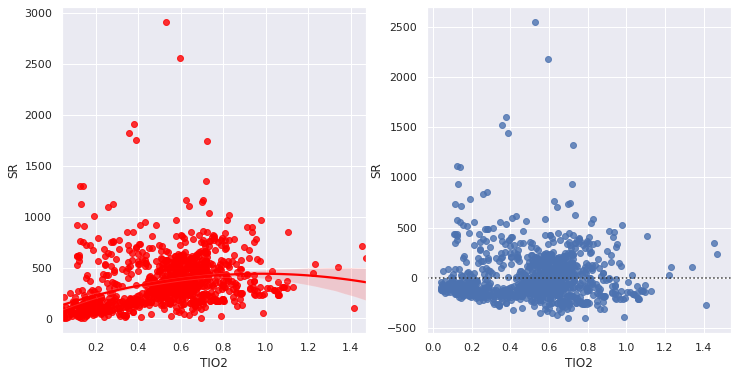

In [20]:
# Linear Regression TIO2 vs. SR
fig, [ax0,ax1]= plt.subplots(1,2)
fig.set_size_inches([12,6])
sns.regplot(data=X,x='TIO2',y='SR',ax=ax0)
sns.residplot(data=X,x='TIO2',y='SR',ax=ax1)
plt.show()

# Polynomial regression TIO2 vs.SR
fig, [ax0,ax1]= plt.subplots(1,2)
fig.set_size_inches([12,6])
sns.regplot(data=X,x='TIO2',y='SR',order=2,ax=ax0, color='red')
sns.residplot(data=X,x='TIO2',y='SR',order=2,ax=ax1)
plt.show()

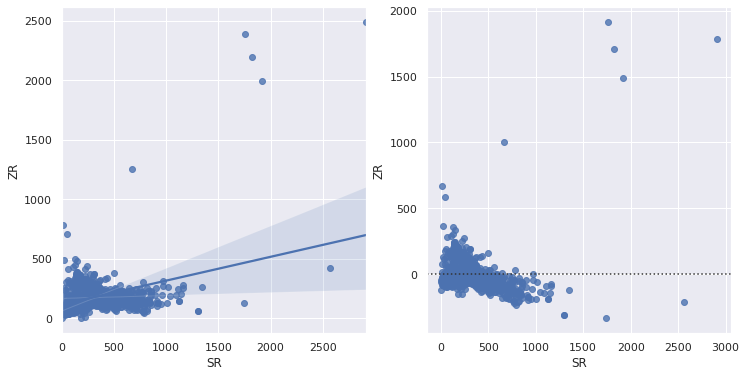

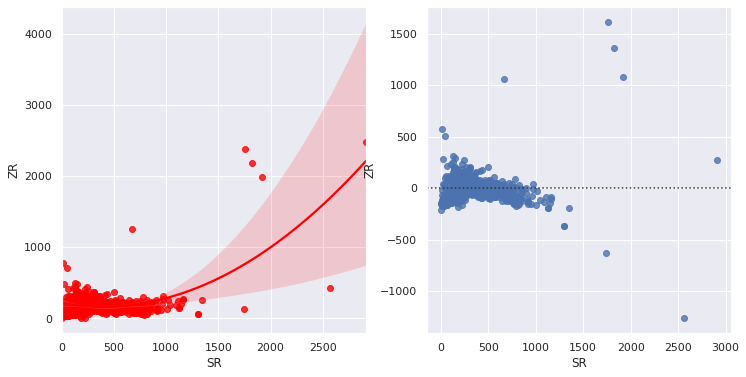

In [21]:
# Linear Regression SR vs.ZR
fig, [ax0,ax1]= plt.subplots(1,2)
fig.set_size_inches([12,6])
sns.regplot(data=X,x='SR',y='ZR',ax=ax0)
sns.residplot(data=X,x='SR',y='ZR',ax=ax1)
plt.show()

# Polynomial regression SR vs.ZR
fig, [ax0,ax1]= plt.subplots(1,2)
fig.set_size_inches([12,6])
sns.regplot(data=X,x='SR',y='ZR',order=2,ax=ax0, color='red')
sns.residplot(data=X,x='SR',y='ZR',order=2,ax=ax1)
plt.show()

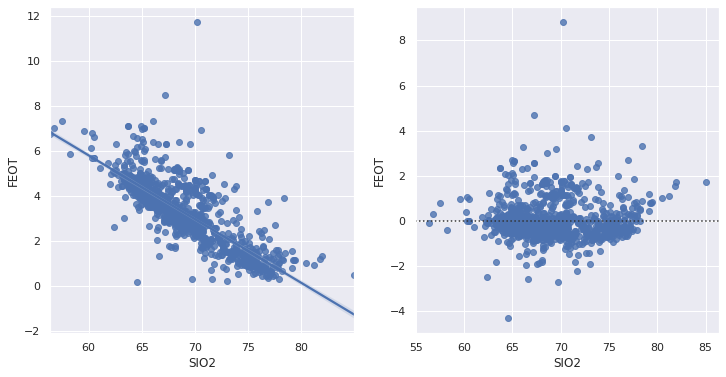

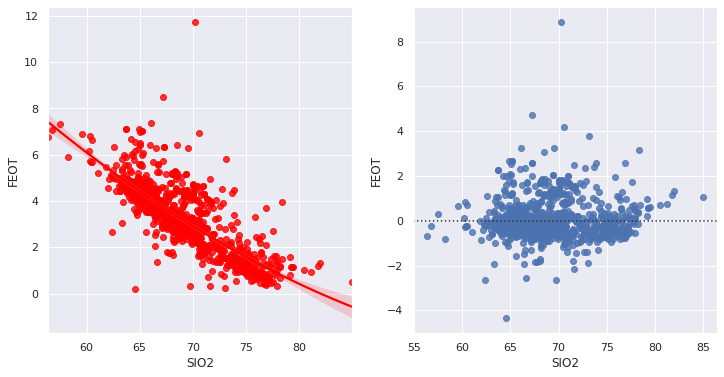

In [22]:
# Linear Regression SiO2 vs. FEOT 
fig, [ax0,ax1]= plt.subplots(1,2)
fig.set_size_inches([12,6])
sns.regplot(data=X,x='SIO2',y='FEOT',ax=ax0)
sns.residplot(data=X,x='SIO2',y='FEOT',ax=ax1)
plt.show()

# Polynomial regression SiO2 vs. FEOT 
fig, [ax0,ax1]= plt.subplots(1,2)
fig.set_size_inches([12,6])
sns.regplot(data=X,x='SIO2',y='FEOT',order=2,ax=ax0, color='red')
sns.residplot(data=X,x='SIO2',y='FEOT',order=2,ax=ax1)
plt.show()

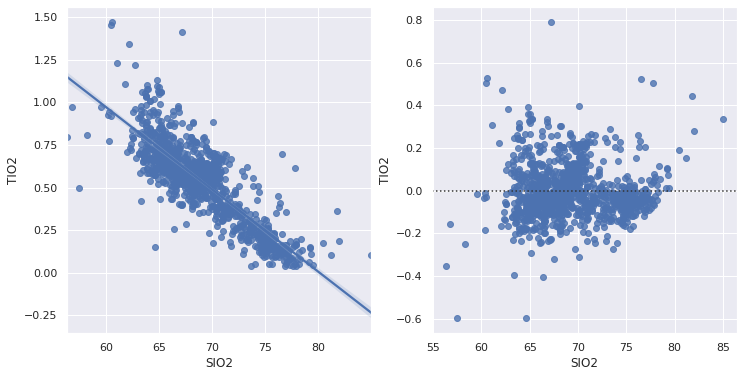

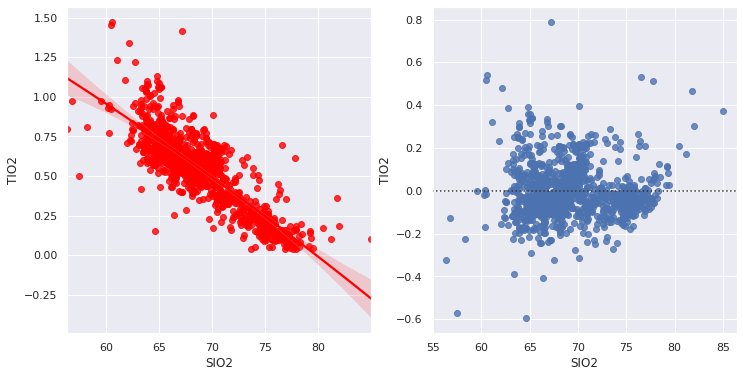

In [23]:
# Linear Regression SiO2 vs. TIO2
fig, [ax0,ax1]= plt.subplots(1,2)
fig.set_size_inches([12,6])
sns.regplot(data=X,x='SIO2',y='TIO2',ax=ax0)
sns.residplot(data=X,x='SIO2',y='TIO2',ax=ax1)
plt.show()

# Polynomial regression SiO2 vs. TIO2 
fig, [ax0,ax1]= plt.subplots(1,2)
fig.set_size_inches([12,6])
sns.regplot(data=X,x='SIO2',y='TIO2',order=2,ax=ax0, color='red')
sns.residplot(data=X,x='SIO2',y='TIO2',order=2,ax=ax1)
plt.show()

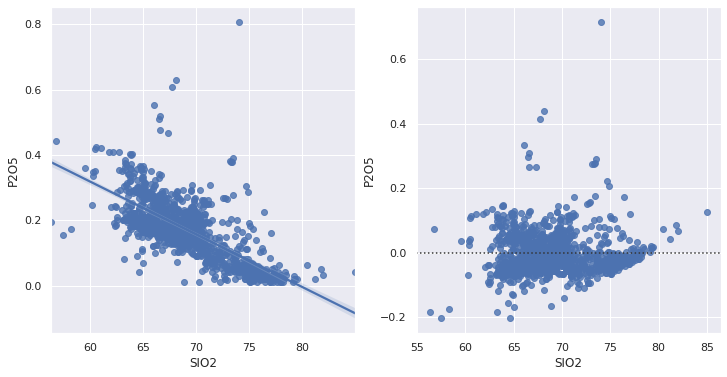

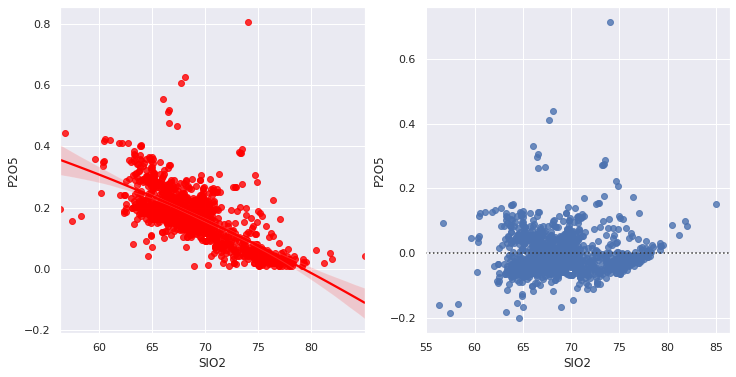

In [24]:
# Linear Regression SiO2 vs. P2O5
fig, [ax0,ax1]= plt.subplots(1,2)
fig.set_size_inches([12,6])
sns.regplot(data=X,x='SIO2',y='P2O5',ax=ax0)
sns.residplot(data=X,x='SIO2',y='P2O5',ax=ax1)
plt.show()

# Polynomial regression SiO2 vs. P2O5 
fig, [ax0,ax1]= plt.subplots(1,2)
fig.set_size_inches([12,6])
sns.regplot(data=X,x='SIO2',y='P2O5',order=2,ax=ax0, color='red')
sns.residplot(data=X,x='SIO2',y='P2O5',order=2,ax=ax1)
plt.show()

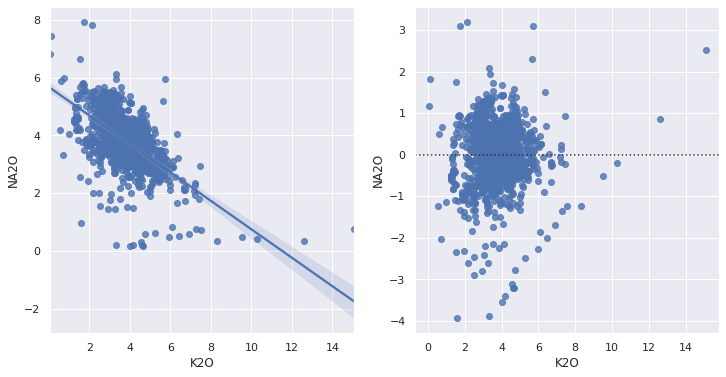

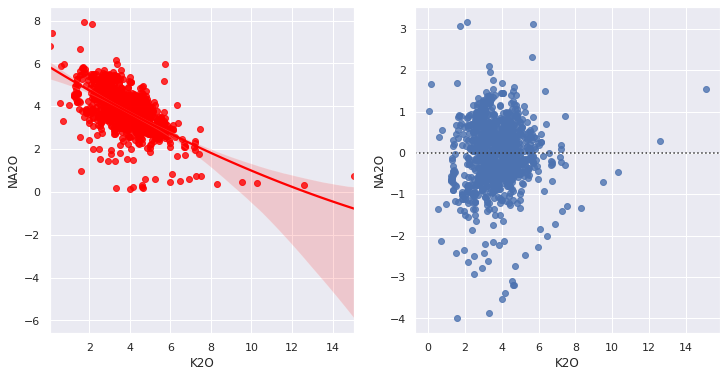

In [25]:
# Linear Regression K2O vs. NA2O
fig, [ax0,ax1]= plt.subplots(1,2)
fig.set_size_inches([12,6])
sns.regplot(data=X,x='K2O',y='NA2O',ax=ax0)
sns.residplot(data=X,x='K2O',y='NA2O',ax=ax1)
plt.show()

# Polynomial regression K2O vs. NA2O 
fig, [ax0,ax1]= plt.subplots(1,2)
fig.set_size_inches([12,6])
sns.regplot(data=X,x='K2O',y='NA2O',order=2,ax=ax0, color='red')
sns.residplot(data=X,x='K2O',y='NA2O',order=2,ax=ax1)
plt.show()

In [26]:
#y_new_train = pd.DataFrame(y_new_train)
#y_new_test = pd.DataFrame(y_new_test)

print('Training Features Shape:', X_train.shape)
#print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
#print('Testing Labels Shape:', y_test.shape)

print('Training Labels Shape:', y_new_train.shape)
print('Testing Labels Shape:', y_new_test.shape)


Training Features Shape: (928, 15)
Testing Features Shape: (233, 15)
Training Labels Shape: (928,)
Testing Labels Shape: (233,)


In [27]:
# Replacing 0 clusters with another number 

y_new_train = np.where(y_new_train==0, 3, y_new_train) 
y_new_test = np.where(y_new_test==0, 3, y_new_test) 

Random Forest

In [28]:
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

# Train the model on training data
#rf.fit(X_train, y_train);
rf.fit(X_train, y_new_train);

In [29]:
# Use the forest's predict method on the test data
predictions = rf.predict(X_test)

# Calculate the absolute errors
errors = abs(predictions - y_new_test)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
mape = np.mean(100 * (errors / y_new_test))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 0.28 degrees.
Accuracy: 85.95 %.


In [32]:
# Calculate mean absolute percentage error (MAPE)
#mape = 100 * (errors / X_test)
# Calculate and display accuracy
#accuracy = 100 - np.mean(mape)
#print('Accuracy:', round(accuracy, 2), '%.')

In [49]:
# New random forest with only the two most important variables
rf_most_important = RandomForestRegressor(n_estimators= 1000, random_state=42)

# Extract the two most important features
important_indices = ['BA','SR']
train_important = X_train[important_indices]
test_important = X_test[important_indices]

# Train the random forest
rf_most_important.fit(train_important, y_train)

# Make predictions and determine the error
predictions = rf_most_important.predict(test_important)
errors = abs(predictions - y_test)

# Display the performance metrics
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
mape = np.mean(100 * (errors / y_test))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')


Mean Absolute Error: 183.63 degrees.
Accuracy: 97.72 %.


In [51]:
# Plotting the tree

# Saving feature names for later use
feature_list = list(X.columns)

# Limit depth of tree to 3 levels
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(X_train, y_train)

# Extract the small tree
tree_small = rf_small.estimators_[5]

# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = feature_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png');#

In [52]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: BA                   Importance: 0.69
Variable: SR                   Importance: 0.22
Variable: RB                   Importance: 0.02
Variable: MGO                  Importance: 0.01
Variable: NA2O                 Importance: 0.01
Variable: K2O                  Importance: 0.01
Variable: TH                   Importance: 0.01
Variable: ZR                   Importance: 0.01
Variable: SIO2                 Importance: 0.0
Variable: TIO2                 Importance: 0.0
Variable: AL2O3                Importance: 0.0
Variable: FEOT                 Importance: 0.0
Variable: MNO                  Importance: 0.0
Variable: CAO                  Importance: 0.0
Variable: P2O5                 Importance: 0.0


Here, we see that K2O and NA2O are the most significant variables. This makes sense as igneous rocks are determined by their alkali metals (Na2O+ K2O)


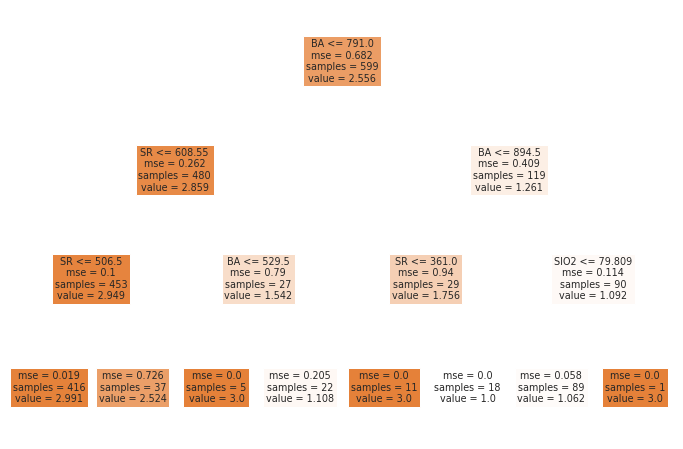

In [53]:
# Limit depth of tree to 3 levels
rf = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf.fit(X_train, y_new_train)

plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})
# Tree plot
_ = tree.plot_tree(rf.estimators_[0], feature_names=X_train.columns, filled=True)


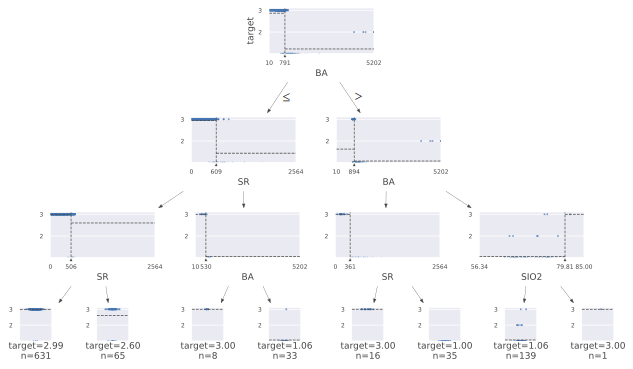

In [54]:
viz = dtreeviz(rf.estimators_[0], X_train, y_new_train, feature_names=feature_list, target_name='target')
viz

In [55]:
# Testing data random forest

# Limit depth of tree to 3 levels
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(X_test, y_new_test)
# Extract the small tree
tree_small = rf_small.estimators_[5]
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = feature_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png');

In [56]:
# Use the forest's predict method on the test data
predictions = rf.predict(X_test)

# Calculate the absolute errors
errors = abs(predictions - y_new_test)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
mape = np.mean(100 * (errors / y_new_test))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 0.3 degrees.
Accuracy: 85.54 %.


In [45]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: BA                   Importance: 0.79
Variable: SR                   Importance: 0.18
Variable: ZR                   Importance: 0.02
Variable: SIO2                 Importance: 0.0
Variable: TIO2                 Importance: 0.0
Variable: AL2O3                Importance: 0.0
Variable: FEOT                 Importance: 0.0
Variable: MNO                  Importance: 0.0
Variable: MGO                  Importance: 0.0
Variable: CAO                  Importance: 0.0
Variable: NA2O                 Importance: 0.0
Variable: K2O                  Importance: 0.0
Variable: P2O5                 Importance: 0.0
Variable: RB                   Importance: 0.0
Variable: TH                   Importance: 0.0


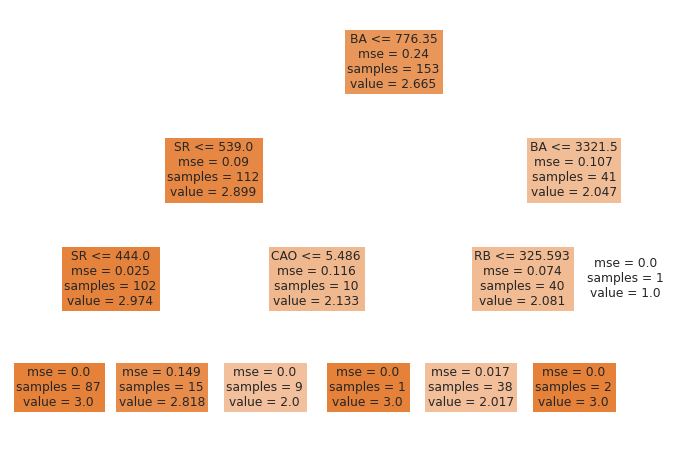

In [46]:
# Limit depth of tree to 3 levels
rf = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf.fit(X_test, y_new_test)

plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})
# Tree plot
_ = tree.plot_tree(rf.estimators_[0], feature_names=X_test.columns, filled=True)


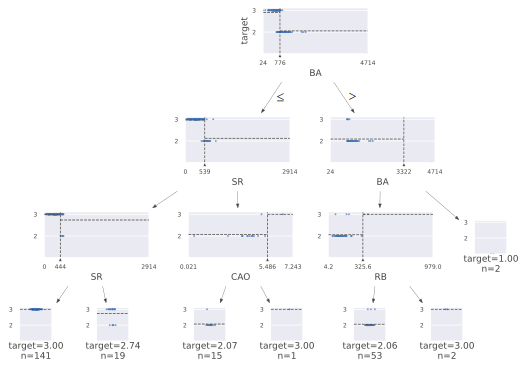

In [47]:
viz = dtreeviz(rf.estimators_[0],X_test, y_new_test, feature_names=feature_list, target_name='target')
viz

Evaluation

Conclusion

---



---



---



---



Attribution

Bibliography